# BANK LOAN ANALYSIS REPORT

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px



In [2]:
df=pd.read_excel("/home/martin/Escritorio/Python/Bank loans analysis/financial_loan.xlsx")

### Metadata of data

In [3]:
print ("No of rows:",df.shape[0])

No of rows: 38576


In [4]:
print ("No of columns:",df.shape[1])

No of columns: 24


In [5]:
df.info

<bound method DataFrame.info of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat T

### Data types

In [6]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [7]:
df.describe

<bound method NDFrame.describe of             id address_state application_type emp_length  \
0      1077430            GA       INDIVIDUAL   < 1 year   
1      1072053            CA       INDIVIDUAL    9 years   
2      1069243            CA       INDIVIDUAL    4 years   
3      1041756            TX       INDIVIDUAL   < 1 year   
4      1068350            IL       INDIVIDUAL  10+ years   
...        ...           ...              ...        ...   
38571   803452            NJ       INDIVIDUAL   < 1 year   
38572   970377            NY       INDIVIDUAL    8 years   
38573   875376            CA       INDIVIDUAL    5 years   
38574   972997            NY       INDIVIDUAL    5 years   
38575   682952            NY       INDIVIDUAL    4 years   

                             emp_title grade home_ownership issue_date  \
0                                Ryder     C           RENT 2021-02-11   
1                       MKC Accounting     E           RENT 2021-01-01   
2                Chemat

### Total loan aplications

In [8]:
total_loan_aplications= df['id'].count ()
print("Total Loan Aplicattions:",total_loan_aplications)

Total Loan Aplicattions: 38576


### MTD Total Loan Applicarion

In [9]:
latest_issue_date= df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month

mtd_data=df[(df['issue_date'].dt.year==latest_year)&(df['issue_date'].dt.month==latest_month)]

mtd_loan_applications=mtd_data['id'].count()

print(f"MTD Loan Applications(for{latest_issue_date.strftime('%B %Y')}):{mtd_loan_applications}")

MTD Loan Applications(forDecember 2021):4314


### Total Funded Amount

In [10]:
total_funded_amount=df['loan_amount'].sum()
total_funded_amount_millions=total_funded_amount/1000000
print("total_funded_amount:${:.2f}M".format(total_funded_amount_millions))

total_funded_amount:$435.76M


### MTD - Total Funded Amount

In [11]:
latest_issue_date= df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month

mtd_data=df[(df['issue_date'].dt.year==latest_year)&(df['issue_date'].dt.month==latest_month)]

mtd_total_funded_amount=mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount/1000000

print("MTD Total Funded Amount:${:.2f}M". format(mtd_total_funded_amount_millions))

MTD Total Funded Amount:$53.98M


### Total Amount Received

In [12]:
total_amount_received=df['total_payment'].sum()
total_amount_received_millions=total_funded_amount/1000000
print("Total Amount Received:${:.2f}M".format(total_amount_received_millions))

Total Amount Received:$435.76M


### MTD Total Amount Received

In [13]:
latest_issue_date= df['issue_date'].max()
latest_year=latest_issue_date.year
latest_month=latest_issue_date.month

mtd_data=df[(df['issue_date'].dt.year==latest_year)&(df['issue_date'].dt.month==latest_month)]

mtd_total_amount_received=mtd_data['loan_amount'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received/1000000

print("MTD Total Amount Received:${:.2f}M". format(mtd_total_amount_received_millions))

MTD Total Amount Received:$53.98M


### Average Interest Rate 

In [14]:
average_interest_rate= df['int_rate'].mean()*100
print("Avg Int Rate:{:.2f}%".format(average_interest_rate))

Avg Int Rate:12.05%


### Average Debt-to Income Ratio (DTI)

In [15]:
average_dti= df['dti'].mean()*100
print("Avg DTI:{:.2f}%".format(average_dti))

Avg DTI:13.33%


### Good Loan Metrics

In [16]:
good_loans = df[df['loan_status'].isin(["Fully Paid","Current"])] ## Fully paid on time loans

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount / 1000000
good_loan_received_millions = good_loan_received / 1000000

good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

print("Good Loan Applications:", good_loan_applications)
print("Good Loan Funded Amount (In Millions): ${:.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Received (In Millions): ${:.2f}M".format(good_loan_received_millions))
print("Percentage of Good good_loan_applications: ${:.2f}M".format(good_loan_percentage))

Good Loan Applications: 33243
Good Loan Funded Amount (In Millions): $370.22M
Good Loan Total Received (In Millions): $435.79M
Percentage of Good good_loan_applications: $86.18M


### Bad Loan Metrics

In [17]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])] ## loans not recovered on time or not recovered at all

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount / 1000000
bad_loan_received_millions = bad_loan_received / 1000000

bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100

print("Bad Loan Applications:", bad_loan_applications)
print("Bad Loan Funded Amount (In Millions): ${:.2f}M".format(bad_loan_funded_amount_millions))
print("Bad Loan Total Received (In Millions): ${:.2f}M".format(bad_loan_received_millions))
print("Percentage of Bad loan applications: ${:.2f}M".format(bad_loan_percentage))

Bad Loan Applications: 5333
Bad Loan Funded Amount (In Millions): $65.53M
Bad Loan Total Received (In Millions): $37.28M
Percentage of Bad loan applications: $13.82M


### MONTHLY TRENDS BY ISSUE DATE FOR TOTAL FUNDED AMOUNT

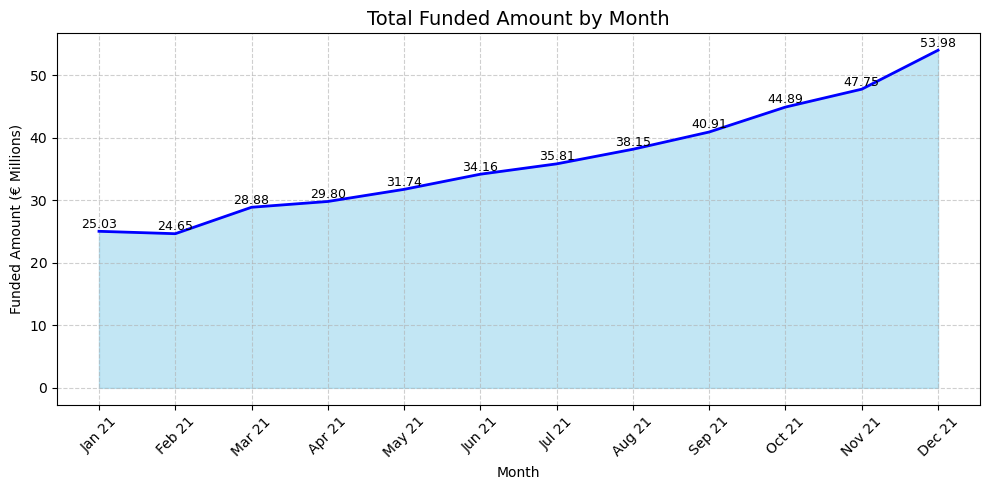

In [19]:
monthly_funded = (
    df.sort_values('issue_date')
    .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %y'))
    .groupby('month_name', sort=False)['loan_amount']
    .sum()
    .div(1_000_000)
    .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10,5))

# Usamos índice numérico en el eje X
x = range(len(monthly_funded))

# Área y línea
plt.fill_between(x, monthly_funded['loan_amount_millions'], color='skyblue', alpha=0.5)
plt.plot(x, monthly_funded['loan_amount_millions'], color='blue', linewidth=2)

# Etiquetas de valores
for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1,
             f"{row['loan_amount_millions']:.2f}",
             ha='center', va='bottom', fontsize=9, color='black')

# Títulos y ejes
plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount (€ Millions)')

# Etiquetas personalizadas en el eje X
plt.xticks(ticks=x, labels=monthly_funded['month_name'], rotation=45)

# Estética
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
    